<a href="https://colab.research.google.com/github/jmbmartins/LogisticRegressionProject/blob/main/Pratical_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 10/10000 - Loss: 0.6431
Iteration 20/10000 - Loss: 0.5968
Iteration 30/10000 - Loss: 0.5587
Iteration 40/10000 - Loss: 0.5269
Iteration 50/10000 - Loss: 0.5004
Iteration 60/10000 - Loss: 0.4781
Iteration 70/10000 - Loss: 0.4592
Iteration 80/10000 - Loss: 0.4430
Iteration 90/10000 - Loss: 0.4291
Iteration 100/10000 - Loss: 0.4170
Iteration 110/10000 - Loss: 0.4065
Iteration 120/10000 - Loss: 0.3973
Iteration 130/10000 - Loss: 0.3892
Iteration 140/10000 - Loss: 0.3819
Iteration 150/10000 - Loss: 0.3755
Iteration 160/10000 - Loss: 0.3697
Iteration 170/10000 - Loss: 0.3645
Iteration 180/10000 - Loss: 0.3598
Iteration 190/10000 - Loss: 0.3555
Iteration 200/10000 - Loss: 0.3515
Iteration 210/10000 - Loss: 0.3479
Iteration 220/10000 - Loss: 0.3446
Iteration 230/10000 - Loss: 0.3415
Iteration 240/10000 - Loss: 0.3387
Iteration 250/10000 - Loss: 0.3360
Iteration 260/10000 - Loss: 0.3335
Iteration 270/10000 - Loss: 0.3312
Iteration 280/10000 - Loss: 0.3290
Iteration 290/10000 - Loss: 0

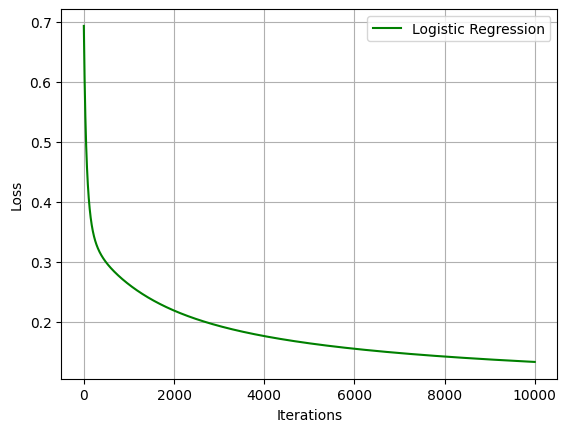

Test accuracy: 0.858
Confusion Matrix:
[[ 942    0    3    4    0    2   16    1   12    0]
 [   0 1088    8    3    1    1    4    0   30    0]
 [  16   29  830   31   19    0   31   22   48    6]
 [   5    3   22  885    1   20    8   20   35   11]
 [   3    9    5    1  853    1   18    2   16   74]
 [  34   20    7  123   25  567   32   15   51   18]
 [  20    6   13    2   12   17  881    0    7    0]
 [   5   39   27    1   13    0    4  892   11   36]
 [   8   18   13   45    9   18   19   16  814   14]
 [  16   14   14   15   55    8    3   42   14  828]]


In [ ]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


#########################################################################
#   Read, Normalize and Split Data
#########################################################################

def load_and_process_data(file_name):
    # Read data from CSV file and preprocess it
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip the header row
        X = []  # Initialize a list to store input data (pixel values)
        y = []  # Initialize a list to store labels
        for row in csv_reader:
            y.append(int(row[0]))
            temp = [float(i) / 255.0 for i in row[1:]]  # Normalize pixel values
            X.append(temp)

    # Convert data to NumPy arrays for further processing
    X = np.asarray(X)
    y = np.asarray(y)

    # Normalize the pixel values using Min-Max scaling
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    # Add a bias term (1) to the input data
    X = np.append(X, np.ones((X.shape[0], 1), np.float64), axis=1)

    # Convert labels (y) to one-hot encoding
    num_classes = len(np.unique(y))
    y = np.eye(num_classes)[y]

    return X, y


# Read Training Data
X_train, y_train = load_and_process_data('mnist_train.csv')

# Read Test Data
X_test, y_test = load_and_process_data('mnist_test.csv')


#########################################################################
#   Logistic regression
#########################################################################

def compute_loss(y_true, y_pred):
    # Compute the binary cross-entropy loss
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)


def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))


def feed_forward(X, weights, bias):
    # Perform feedforward operation
    z = np.dot(X, weights) + bias
    A = sigmoid(z)
    return A


def fit(X, y, n_iters, lr):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)
    losses = []  # To store loss at each iteration

    for iteration in range(n_iters):
        A = feed_forward(X, weights, bias)
        loss = compute_loss(y, A)
        losses.append(loss)
        dz = A - y
        dw = (1 / n_samples) * np.dot(X.T, dz)
        db = (1 / n_samples) * np.sum(dz, axis=0)
        weights -= lr * dw
        bias -= lr * db

        if (iteration + 1) % 10 == 0:
            print(f"Iteration {iteration + 1}/{n_iters} - Loss: {loss}")

    return weights, bias, losses


learning_rate = 0.001
n_iters = 10000

weights, bias, losses = fit(X_train, y_train, n_iters, learning_rate)

# Plot the loss over iterations
plt.figure(1)
plt.plot(range(n_iters), losses, '-g', label='Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Make predictions on the test data
predictions = feed_forward(X_test, weights, bias)
predicted_classes = np.argmax(predictions, axis=1)

# Compute and display the confusion matrix and test accuracy
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
print("Test accuracy: {0:.3f}".format(np.sum(np.diag(cm)) / np.sum(cm)))
print("Confusion Matrix:")
print(np.array(cm))

input('Close app?')

Added L2 (Ridge) Regularization

Added a dynamic stopping criteria

Iteration 10 - Loss: 0.6430686132659823
Iteration 20 - Loss: 0.5968352474567212
Iteration 30 - Loss: 0.5586541455461445
Iteration 40 - Loss: 0.5269439492602223
Iteration 50 - Loss: 0.500433001210704
Iteration 60 - Loss: 0.47811065333527525
Iteration 70 - Loss: 0.45917786109216535
Iteration 80 - Loss: 0.44300336501204113
Iteration 90 - Loss: 0.4290873826703438
Iteration 100 - Loss: 0.41703262641473454
Iteration 110 - Loss: 0.4065216416521198
Iteration 120 - Loss: 0.3972992767551955
Iteration 130 - Loss: 0.3891591845699873
Iteration 140 - Loss: 0.3819334349841873
Iteration 150 - Loss: 0.3754845062593486
Iteration 160 - Loss: 0.3696990883829596
Iteration 170 - Loss: 0.36448326633130756
Iteration 180 - Loss: 0.35975875625337517
Iteration 190 - Loss: 0.3554599478440737
Iteration 200 - Loss: 0.3515315667124671
Iteration 210 - Loss: 0.34792681594164687
Iteration 220 - Loss: 0.3446058900015334
Iteration 230 - Loss: 0.34153477960350764
Iteration 240 - Loss: 0.3386843051642793
Iteration 250 - Lo

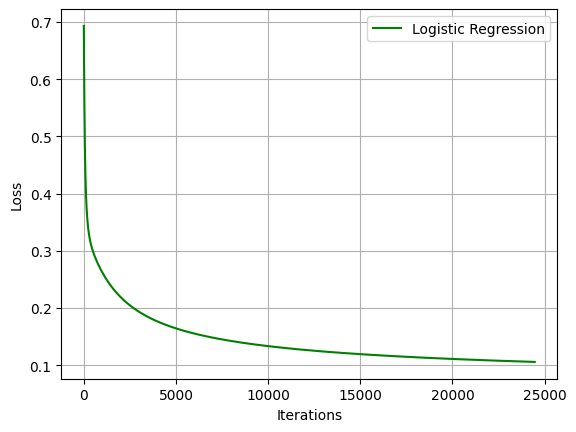

Test accuracy: 0.878
Confusion Matrix:
[[ 952    0    2    2    0    2   13    1    8    0]
 [   0 1094    4    3    1    1    4    0   28    0]
 [  12   18  854   27   19    0   25   20   48    9]
 [   6    1   21  893    1   30    8   16   23   11]
 [   1    7    5    0  870    1   15    1   14   68]
 [  21   11    6   71   27  650   25   12   52   17]
 [  17    3    6    2   11   18  892    1    8    0]
 [   2   30   30    3   12    0    4  906    6   35]
 [   8   13   13   37   11   23   14   13  828   14]
 [  16   11   13   12   51   11    1   36   12  846]]


In [ ]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


#########################################################################
#   Read, Normalize and Split Data
#########################################################################

def load_and_process_data(file_name):
    # Read data from CSV file and preprocess it
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip the header row
        X = []  # Initialize a list to store input data (pixel values)
        y = []  # Initialize a list to store labels
        for row in csv_reader:
            y.append(int(row[0]))
            temp = [float(i) / 255.0 for i in row[1:]]  # Normalize pixel values
            X.append(temp)

    # Convert data to NumPy arrays for further processing
    X = np.asarray(X)
    y = np.asarray(y)

    # Normalize the pixel values using Min-Max scaling
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    # Add a bias term (1) to the input data
    X = np.append(X, np.ones((X.shape[0], 1), np.float64), axis=1)

    # Convert labels (y) to one-hot encoding
    num_classes = len(np.unique(y))
    y = np.eye(num_classes)[y]

    return X, y


# Read Training Data
X_train, y_train = load_and_process_data('mnist_train.csv')

# Read Test Data
X_test, y_test = load_and_process_data('mnist_test.csv')


#########################################################################
#   Logistic regression
#########################################################################

def compute_loss(y_true, y_pred, weights, lambda_reg):
    # Compute the binary cross-entropy loss with L2 regularization
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
    regularization_term = (lambda_reg / (2 * len(y_true))) * np.sum(weights ** 2)
    return -np.mean(y1 + y2) + regularization_term



def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))


def feed_forward(X, weights, bias):
    # Perform feedforward operation
    z = np.dot(X, weights) + bias
    A = sigmoid(z)
    return A


def fit(X, y, lr, lambda_reg, stopping_threshold):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)
    losses = []  # To store loss at each iteration

    previous_loss = float('inf')  # Set to a large value initially
    iteration = 0

    while True:
        iteration += 1
        A = feed_forward(X, weights, bias)
        loss = compute_loss(y, A, weights, lambda_reg)
        losses.append(loss)

        if abs(loss - previous_loss) < stopping_threshold:
            print("Stopping training as loss change is smaller than the stopping threshold.")
            break

        dz = A - y
        dw = (1 / n_samples) * (np.dot(X.T, dz) + lambda_reg * weights)
        db = (1 / n_samples) * np.sum(dz, axis=0)
        weights -= lr * dw
        bias -= lr * db

        previous_loss = loss

        if iteration % 10 == 0:
            print(f"Iteration {iteration} - Loss: {loss}")

    return weights, bias, losses, iteration

# Call the fit function with the stopping_threshold
learning_rate = 0.001
lambda_reg = 0.01
stopping_threshold = 1e-6

weights, bias, losses,n_iters = fit(X_train, y_train, learning_rate, lambda_reg, stopping_threshold)



# Plot the loss over iterations
plt.figure(1)
plt.plot(range(n_iters), losses, '-g', label='Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Make predictions on the test data
predictions = feed_forward(X_test, weights, bias)
predicted_classes = np.argmax(predictions, axis=1)

# Compute and display the confusion matrix and test accuracy
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
print("Test accuracy: {0:.3f}".format(np.sum(np.diag(cm)) / np.sum(cm)))
print("Confusion Matrix:")
print(np.array(cm))

input('Close app?')

With Z-Score

In [ ]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



#########################################################################
#   Read, Normalize and Split Data
#########################################################################

def load_and_process_data(file_name):
    # Read data from CSV file and preprocess it
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip the header row
        X = []  # Initialize a list to store input data (pixel values)
        y = []  # Initialize a list to store labels
        for row in csv_reader:
            y.append(int(row[0]))
            temp = [float(i) / 255.0 for i in row[1:]]  # Normalize pixel values
            X.append(temp)

    # Convert data to NumPy arrays for further processing
    X = np.asarray(X)
    y = np.asarray(y)

    # Normalize the pixel values using Min-Max scaling
    '''
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    '''


    # Normalize the pixel values using Z-score (standardization)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)


    # Add a bias term (1) to the input data
    X = np.append(X, np.ones((X.shape[0], 1), np.float64), axis=1)

    # Convert labels (y) to one-hot encoding
    num_classes = len(np.unique(y))
    y = np.eye(num_classes)[y]

    return X, y


# Read Training Data
X_train, y_train = load_and_process_data('mnist_train.csv')

# Read Test Data
X_test, y_test = load_and_process_data('mnist_test.csv')


#########################################################################
#   Logistic regression
#########################################################################

def compute_loss(y_true, y_pred, weights, lambda_reg):
    # Compute the binary cross-entropy loss with L2 regularization
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
    regularization_term = (lambda_reg / (2 * len(y_true))) * np.sum(weights ** 2)
    return -np.mean(y1 + y2) + regularization_term



def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))


def feed_forward(X, weights, bias):
    # Perform feedforward operation
    z = np.dot(X, weights) + bias
    A = sigmoid(z)
    return A


def fit(X, y, lr, lambda_reg, stopping_threshold):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)
    losses = []  # To store loss at each iteration

    previous_loss = float('inf')  # Set to a large value initially
    iteration = 0

    while True:
        iteration += 1
        A = feed_forward(X, weights, bias)
        loss = compute_loss(y, A, weights, lambda_reg)
        losses.append(loss)

        if abs(loss - previous_loss) < stopping_threshold:
            print("Stopping training as loss change is smaller than the stopping threshold.")
            break

        dz = A - y
        dw = (1 / n_samples) * (np.dot(X.T, dz) + lambda_reg * weights)
        db = (1 / n_samples) * np.sum(dz, axis=0)
        weights -= lr * dw
        bias -= lr * db

        previous_loss = loss

        if iteration % 10 == 0:
            print(f"Iteration {iteration} - Loss: {loss}")

    return weights, bias, losses, iteration

# Call the fit function with the stopping_threshold
learning_rate = 0.001
lambda_reg = 0.01
stopping_threshold = 1e-6

weights, bias, losses,n_iters = fit(X_train, y_train, learning_rate, lambda_reg, stopping_threshold)



# Plot the loss over iterations
plt.figure(1)
plt.plot(range(n_iters), losses, '-g', label='Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Make predictions on the test data
predictions = feed_forward(X_test, weights, bias)
predicted_classes = np.argmax(predictions, axis=1)

# Compute and display the confusion matrix and test accuracy
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
print("Test accuracy: {0:.3f}".format(np.sum(np.diag(cm)) / np.sum(cm)))
print("Confusion Matrix:")
print(np.array(cm))

input('Close app?')

FileNotFoundError: ignored

Iteration 10 - Loss: 0.6831230848145937
Iteration 20 - Loss: 0.6728723238742675
Iteration 30 - Loss: 0.6634300499473744
Iteration 40 - Loss: 0.6546849800825765
Iteration 50 - Loss: 0.6465429835740003
Iteration 60 - Loss: 0.6389248494511702
Iteration 70 - Loss: 0.6317640060254175
Iteration 80 - Loss: 0.6250044342868731
Iteration 90 - Loss: 0.6185988634353757
Iteration 100 - Loss: 0.6125072569833325
Iteration 110 - Loss: 0.606695562900199
Iteration 120 - Loss: 0.6011346898636043
Iteration 130 - Loss: 0.5957996712699606
Iteration 140 - Loss: 0.5906689826660096
Iteration 150 - Loss: 0.5857239835430952
Iteration 160 - Loss: 0.5809484596112057
Iteration 170 - Loss: 0.5763282462229486
Iteration 180 - Loss: 0.5718509174233753
Iteration 190 - Loss: 0.5675055281987803
Iteration 200 - Loss: 0.5632823999824195
Iteration 210 - Loss: 0.5591729414541126
Iteration 220 - Loss: 0.5551694982418968
Iteration 230 - Loss: 0.5512652263804994
Iteration 240 - Loss: 0.5474539853714439
Iteration 250 - Loss: 0.54

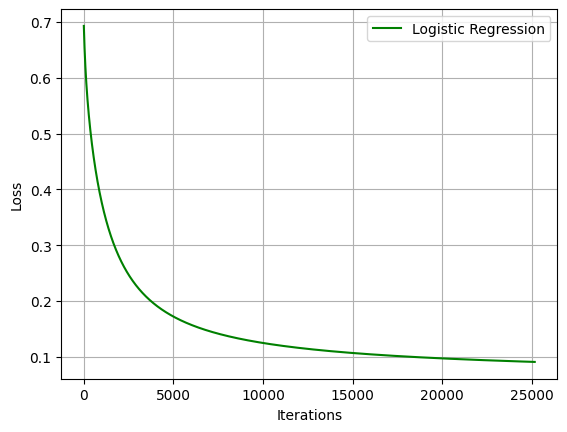

Test accuracy: 0.896
Confusion Matrix:
[[ 958    0    1    1    0    8    8    1    2    1]
 [   0 1104    3    3    1    1    5    0   18    0]
 [  13   21  887   20   11    0   17   21   37    5]
 [   5    7   25  894    3   29    5   17   17    8]
 [   0   10    7    1  911    2    7    5    5   34]
 [  16    8    2   36   19  741   21   13   25   11]
 [  11    8    9    0   17   18  895    0    0    0]
 [   4   26   19    7   11    1    1  923    0   36]
 [  15   28    9   22   21   31   14   19  800   15]
 [  16    9    1   16   57    9    0   43    6  852]]
Close app?yes


'yes'

In [ ]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



#########################################################################
#   Read, Normalize and Split Data
#########################################################################

def load_and_process_data(file_name):
    # Read data from CSV file and preprocess it
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip the header row
        X = []  # Initialize a list to store input data (pixel values)
        y = []  # Initialize a list to store labels
        for row in csv_reader:
            y.append(int(row[0]))
            temp = [float(i) / 255.0 for i in row[1:]]  # Normalize pixel values
            X.append(temp)

    # Convert data to NumPy arrays for further processing
    X = np.asarray(X)
    y = np.asarray(y)

    # Normalize the pixel values using Min-Max scaling
    '''
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    '''


    # Normalize the pixel values using Z-score (standardization)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)


    # Add a bias term (1) to the input data
    X = np.append(X, np.ones((X.shape[0], 1), np.float64), axis=1)

    # Convert labels (y) to one-hot encoding
    num_classes = len(np.unique(y))
    y = np.eye(num_classes)[y]

    return X, y


# Read Training Data
X_train, y_train = load_and_process_data('mnist_train.csv')

# Read Test Data
X_test, y_test = load_and_process_data('mnist_test.csv')


#########################################################################
#   Logistic regression
#########################################################################

def compute_loss(y_true, y_pred, weights, lambda_reg):
    # Compute the binary cross-entropy loss with L2 regularization
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
    regularization_term = (lambda_reg / (2 * len(y_true))) * np.sum(weights ** 2)
    return -np.mean(y1 + y2) + regularization_term



def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))


def feed_forward(X, weights, bias):
    # Perform feedforward operation
    z = np.dot(X, weights) + bias
    A = sigmoid(z)
    return A


def fit(X, y, lr, lambda_reg, stopping_threshold):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)
    losses = []  # To store loss at each iteration

    previous_loss = float('inf')  # Set to a large value initially
    iteration = 0

    while True:
        iteration += 1
        A = feed_forward(X, weights, bias)
        loss = compute_loss(y, A, weights, lambda_reg)
        losses.append(loss)

        if abs(loss - previous_loss) < stopping_threshold:
            print("Stopping training as loss change is smaller than the stopping threshold.")
            break

        dz = A - y
        dw = (1 / n_samples) * (np.dot(X.T, dz) + lambda_reg * weights)
        db = (1 / n_samples) * np.sum(dz, axis=0)
        weights -= lr * dw
        bias -= lr * db

        previous_loss = loss

        if iteration % 10 == 0:
            print(f"Iteration {iteration} - Loss: {loss}")

    return weights, bias, losses, iteration

# Call the fit function with the stopping_threshold
learning_rate = 0.001
lambda_reg = 0.1
stopping_threshold = 1e-6

weights, bias, losses,n_iters = fit(X_train, y_train, learning_rate, lambda_reg, stopping_threshold)



# Plot the loss over iterations
plt.figure(1)
plt.plot(range(n_iters), losses, '-g', label='Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Make predictions on the test data
predictions = feed_forward(X_test, weights, bias)
predicted_classes = np.argmax(predictions, axis=1)

# Compute and display the confusion matrix and test accuracy
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
print("Test accuracy: {0:.3f}".format(np.sum(np.diag(cm)) / np.sum(cm)))
print("Confusion Matrix:")
print(np.array(cm))

input('Close app?')